# Binning, Discretization, Linear Models, and Trees

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

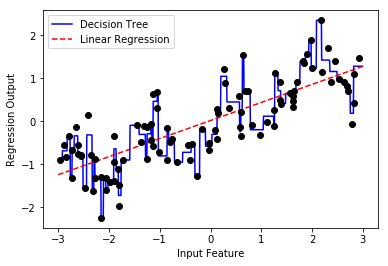

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), '-b', label='Decision Tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--r', label='Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')
plt.legend(loc='best');

- Linear models can only model linear relationships.
- Decision Tree can build more complex model of the data.
- We can make linear models more powerful on continuous data by using binning (discretization) of the feature to split it up into multiple features.

We create bins using np.linspace

In [10]:
bins = np.linspace(-3, 3, 11) # 11 entries, 10 bins
print("Bins: {}".format(bins))

Bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


We record for each data point which bin it falls into.

In [11]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [16]:
which_bin.shape

(100, 1)

In [19]:
np.unique(which_bin)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [17]:
X.shape

(100, 1)

What we did here is transform the single continuous input feature in the wave dataset
into a categorical feature that encodes which bin a data point is in.

In [20]:
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot-encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Now we build a new linear regression model and a new decision tree model on the one-hot-encoded data.

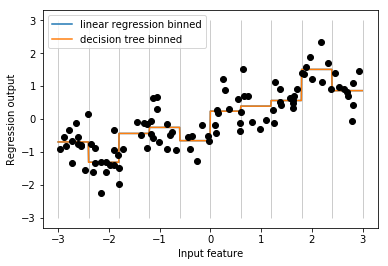

In [24]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature");

- Linear regression model and the decision tree make exactly the same predictions.
- By using binning we see that we make linear models more flexible.
- Binning features has no benificial effect to tree based algorithm.
- If there are good reasons to use a linear model for a particular dataset--because it is very large and high-dimensional, but some features have non-linear relations with the output--binning can be a great way to increase modeling power.

---

# IMPORTANT POINTS

- We can use binning feature to make linear model more flexible.
- Important methods:
    - np.digitize(arraylike, bins)
    - OneHotEncoder
- Binning steps:
    - Load data
    - Create bins, using np.linspace, or any array actually
    - np.digitize return which bin a value is
    - Using OneHotEncoder to encode.

---

# Experiment

In [77]:
X, y = mglearn.datasets.make_wave(n_samples=500)

In [78]:
lin_reg = LinearRegression().fit(X, y)
tree = DecisionTreeRegressor().fit(X, y)

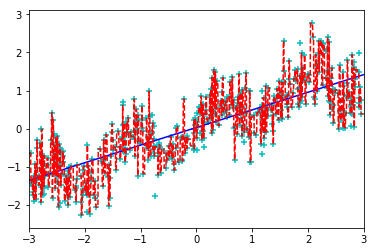

In [79]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

plt.plot(line, lin_reg.predict(line), '-b', label='Linear Regression')
plt.plot(line, tree.predict(line), '--r', label='Decision Tree')
plt.xlim(-3, 3)
plt.scatter(X, y, marker='+', c='c');

In [80]:
bins = np.linspace(-3, 3, 21)
which_bins = np.digitize(X, bins=bins)

In [81]:
bins

array([-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
        0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ])

In [82]:
which_bins.shape

(500, 1)

In [84]:
encoder = OneHotEncoder(sparse=False).fit(which_bins)

X_binned = encoder.transform(which_bins)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [85]:
X_binned.shape

(500, 20)

In [86]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [87]:
line_binned.shape

(1000, 20)

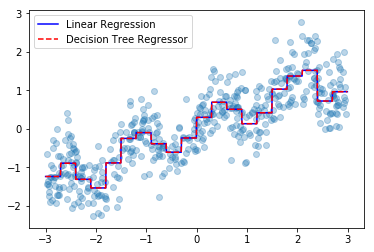

In [95]:
lin_reg = LinearRegression().fit(X_binned, y)
plt.plot(line, lin_reg.predict(line_binned), '-b', label='Linear Regression')

tree = DecisionTreeRegressor().fit(X_binned, y)
plt.plot(line, tree.predict(line_binned), '--r', label='Decision Tree Regressor')

plt.scatter(X, y, alpha=0.3)
plt.legend();